# La distribución de Laplace para Differential Privacy

Uno de los fundamentos de differential privacy es la utilización de procesos, que mediante la adición de ruido, nos permitan generar operaciones ϵ-differentially private.

La construcción más básica para hacer una operación differentially private es la adición de ruido mediante la distribución de Laplace. En el código de más abajo se muestra una distribución de Laplace con sus parámetros μ y b. En el caso más básico trataremos una distribución con \mu=0 (siendo la media del ruido que introduciremos 0) y una b que sea 1/ϵ.

De esta manera se puede observar que cuanto mayor es el epsilon mayor es la probabilidad de que el ruido introducido sea muy pequeño y por lo tanto tenga muy poco valor estadístico sobre la operación que hemos introducido. En terminos generales se recomienda utilizar un ϵ entre 0 y 1 para establecer unas garantías mínimas de privaciadad, siendo valores por encima del 2 considerados como poco privados.

Prueba a modificar el parámetro ϵ en el código inferiro y comprueba las diferentes distribuciones de ruido que obtienes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

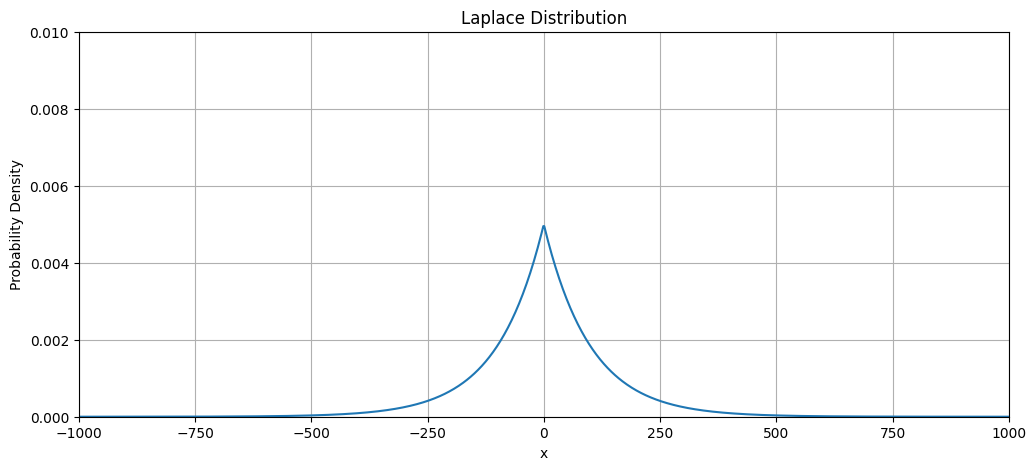

In [4]:
# Parameters
epsilon = 0.01
mu = 0  # mean
b = 1/epsilon   # scale parameter
x_min = -10/epsilon
x_max = 10/epsilon

# Generate data points
x = np.linspace(x_min, x_max, 1000)
def laplace_dist(x,b,mu):
  return (1/(2*b)) * np.exp(-abs(x - mu)/b)

plt.figure(figsize=(12, 5))
plt.plot(x, laplace_dist(x,b,mu))
plt.title('Laplace Distribution')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0, 1*epsilon)  # Limit y-axis
plt.xlim(x_min, x_max)  # Limit x-axis
plt.grid(True)
plt.show()

Para comprobar la cantidad de ruido que generamos podemos generar muestras y compararlas con diferentes valores de b

In [5]:
# Generate random values
laplace_samples = np.random.laplace(mu, b, 10)
print("Generated Laplace samples:", laplace_samples)

Generated Laplace samples: [  -9.21773727 -204.46713132   -1.96951313  -21.304566    -18.5470201
  418.43649683  -17.44819387 -142.87600461  -54.82389439   30.2731037 ]


La gráfica mostrada por el código inferior muestra las distribuciones de probabilidad que resultarían de introducir un ruido basado en la distribución de Laplace (con ϵ=1) si queremos que el resultado devuelto por una operación difiera en una unidad. Se puede comprobar como las dos distribuciones se superponen bastante, lo que haría un atacante no pueda identificar de forma precisa si el resultado original de nuestra operación es 500 ó 501

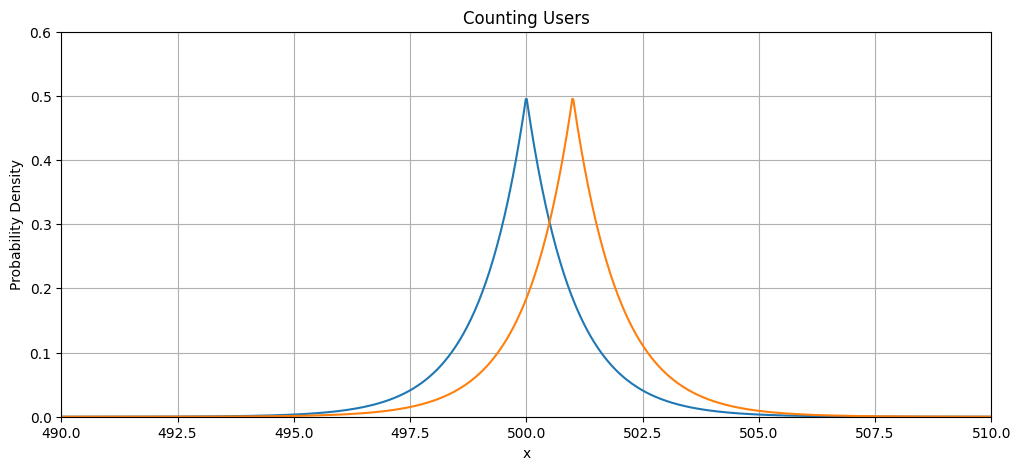

In [6]:
e2 = 1
mu2 = 500  # mean
b2 = 1/e2   # scale parameter
x_min = -10+mu2
x_max = 10+mu2
x = np.linspace(x_min, x_max, 1000)

plt.figure(figsize=(12, 5))
plt.plot(x, laplace_dist(x=x,b=b2,mu=mu2))
plt.plot(x, laplace_dist(x=x,b=b2,mu=mu2+1))
plt.title('Counting Users')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0, 0.6)  # Limit y-axis
plt.xlim(x_min, x_max)  # Limit x-axis
plt.grid(True)
plt.show()

La introducción de ruido utilizando (1/ϵ) es especialmente útil cuando la diferencia entre el resultado de una operación que incluya o no al sujeto se puede diferenciar en una unidad. En cambio si lo que necesitamos es contar eventos o casos en los que un sujeto puede contribuir en más de una unidad, el ruido que deberemos introducir deberá ser proporcional a la máxima contribución que pueda tener un usuario de la base de datos. De esa menera nos aseguramos que el atacante no puede deshacer la cuenta para identificar a su víctima. Esta misma fórmula la podemos aplicar al cálculo de las medias pero en este caso la máxima contribución será la máxima diferencia entre valores del dataset (lo máximo que puede variar entre dos sujetos del mismo)

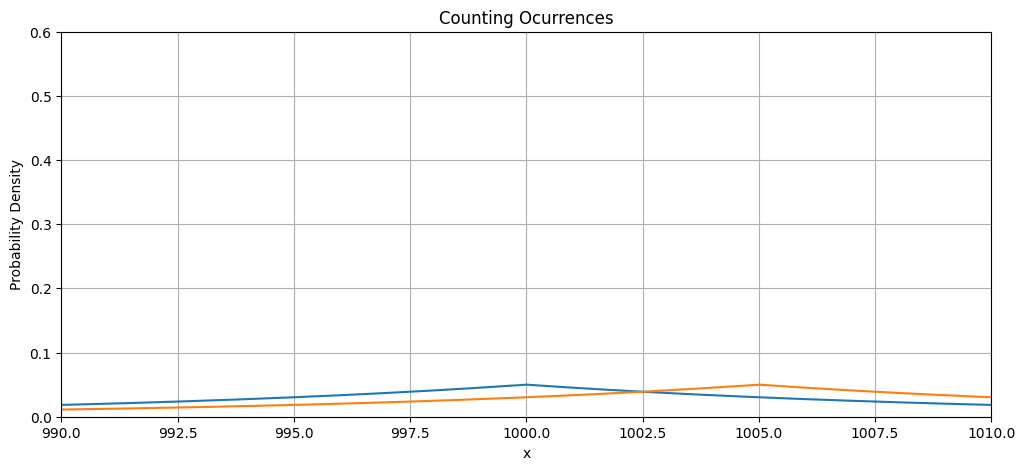

In [10]:
e2 = 1
mu2 = 1000  # mean
b2 = 10/e2   # scale parameter
x_min = -10+mu2
x_max = 10+mu2
x = np.linspace(x_min, x_max, 1000)

plt.figure(figsize=(12, 5))
plt.plot(x, laplace_dist(x=x,b=b2,mu=mu2))
plt.plot(x, laplace_dist(x=x,b=b2,mu=mu2+5))
plt.title('Counting Ocurrences')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0, 0.6)  # Limit y-axis
plt.xlim(x_min, x_max)  # Limit x-axis
plt.grid(True)
plt.show()